# Name Based Gender Identification

Problem Statement

The business problem that we are going to solve is as follows with NLP pipeline steps:

“Given the indian name, identify the gender of the person”

The dataset contains a total of 1299 Indian names. The ‘Gender’ attribute contains the values 0 and 1. 1 corresponds to a boy’s name, while 0 represents a female.

# 1. Import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud


# 2. Load the dataset.

In [2]:
data=pd.read_csv(r"Gender_identification_Indian-Name.csv",encoding='latin1')

In [3]:
data=data[["Name","Target"]]
data.rename(columns={"Target":"Gender"},inplace=True)  

In [4]:
data.shape

(1299, 2)

In [5]:
print(data.dtypes)

Name      object
Gender     int64
dtype: object


# 3. EDA

In [6]:
data["Gender"]=data["Gender"].replace({0:'F',1:'M'}) #For convinience
data

,Name,Gender
0,Yash,M
1,Prit,M
2,Meet,M
3,Drashti,F
4,Saloni,F
...,...,...
1294,Ganga,F
1295,Madhuri,F
1296,Harprit,F
1297,Rubina,F


In [7]:
data["Name"].nunique() #out of 1299, 1181 have unique names

1181

In [8]:
repeat=len(data)-data["Name"].nunique()
repeat #118 names repeated in dataset

118

In [9]:
data=data.drop_duplicates()

# 4. Observations

([<matplotlib.axis.XTick at 0x7f0e67b20310>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

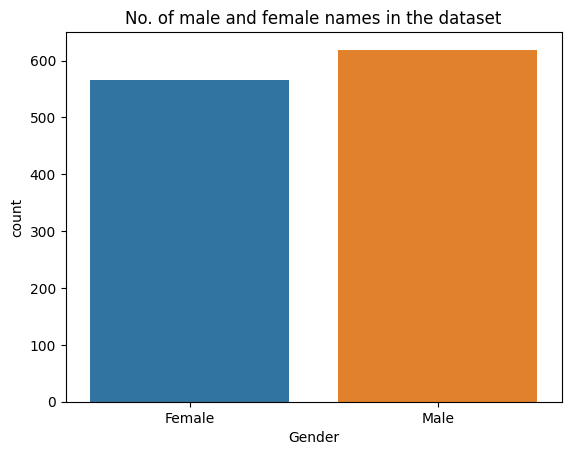

In [10]:
sns.countplot(x='Gender',data = data)
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Female','Male')) #[0,1],('Female','Male') is optional for naming columns

#Conclusion: from graph we can say no major class imbalance

In [11]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
startletter_count = {}
for i in alphabets:
    startletter_count[i]= len(data[data['Name'].str.startswith(i)]) #Analyzing the Starting Letter of Names
print(startletter_count)

{'A': 114, 'B': 43, 'C': 19, 'D': 71, 'E': 6, 'F': 10, 'G': 31, 'H': 47, 'I': 21, 'J': 45, 'K': 73, 'L': 14, 'M': 96, 'N': 73, 'O': 4, 'P': 76, 'Q': 0, 'R': 100, 'S': 188, 'T': 38, 'U': 15, 'V': 62, 'W': 0, 'X': 0, 'Y': 17, 'Z': 8}


Text(0.5, 1.0, 'Number of names starting with each letter')

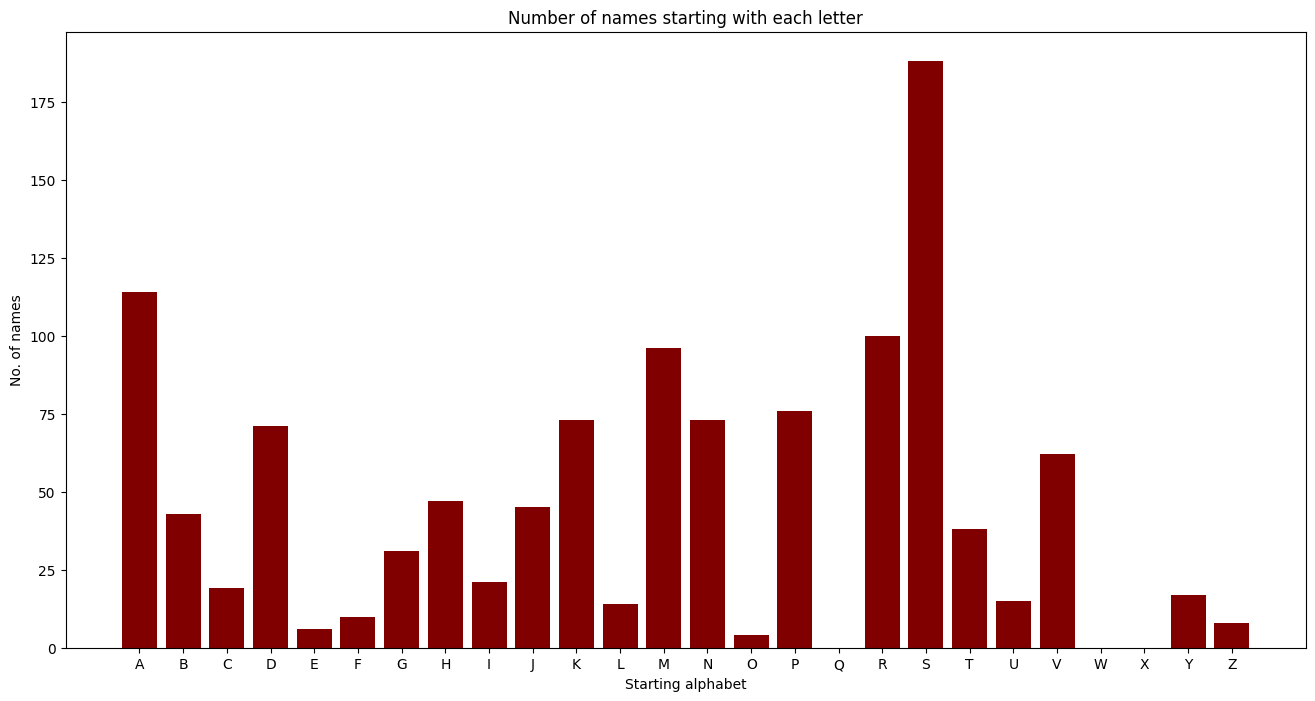

In [12]:
#Visualizing the above information using a bar chart

plt.figure(figsize = (16,8)) #for plot presentation and modifications (size,color)
plt.bar(startletter_count.keys(),startletter_count.values(),color='maroon') #bar(x,y,color)
#since startletter_count is dictionary
plt.xlabel('Starting alphabet')
plt.ylabel('No. of names')
plt.title('Number of names starting with each letter')

In [13]:
print('5 most name starting letters are : ',sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])
#since startletter_count is dictionary

#Conclusion:Most Indian names start with the alphabets A, S, K, V, and M.

5 most name starting letters are :  [('S', 188), ('A', 114), ('R', 100), ('M', 96), ('P', 76)]


In [14]:
small_alphabets = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']
endletter_count ={}
for i in small_alphabets:
    endletter_count[i]=len(data[data['Name'].str.endswith(i)]) #Analyzing the last Letter of Names
print(endletter_count) 

{'a': 344, 'b': 6, 'c': 0, 'd': 15, 'e': 8, 'f': 3, 'g': 10, 'h': 96, 'i': 209, 'j': 19, 'k': 35, 'l': 90, 'm': 30, 'n': 93, 'o': 3, 'p': 15, 'q': 1, 'r': 48, 's': 6, 't': 61, 'u': 33, 'v': 20, 'x': 1, 'y': 32, 'z': 3}


Text(0.5, 1.0, 'Number of names ending with each letter')

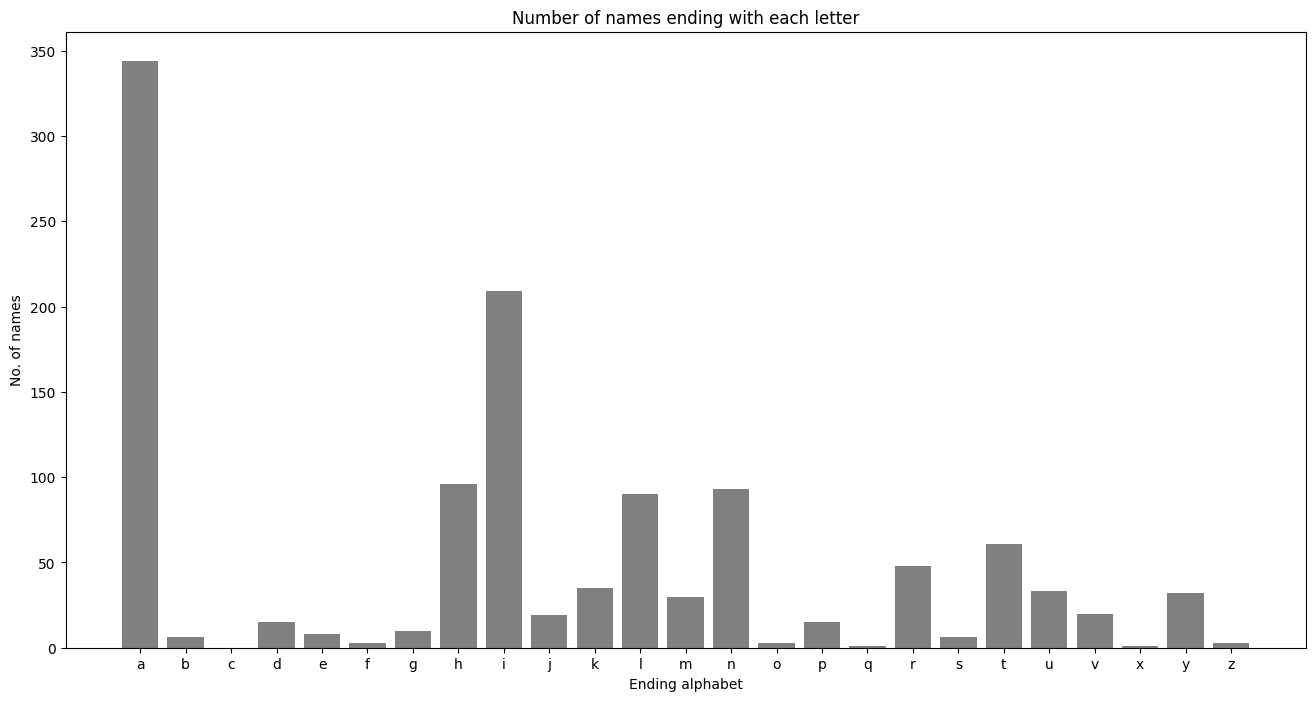

In [15]:
plt.figure(figsize = (16,8))
plt.bar(endletter_count.keys(),endletter_count.values(),color='grey')
plt.xlabel('Ending alphabet')
plt.ylabel('No. of names')
plt.title('Number of names ending with each letter')

In [16]:
print('5 most name ending letters are : ', *sorted(endletter_count.items(),key=lambda item: item[1])[-5:])

#Conclusion:most of the names end with the letters “a,” “n,” “i,” “h,” and “r.”

5 most name ending letters are :  ('l', 90) ('n', 93) ('h', 96) ('i', 209) ('a', 344)


In [17]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import nltk
from nltk.corpus import stopwords
#stopwords = nltk.corpus.stopwords.words('english')

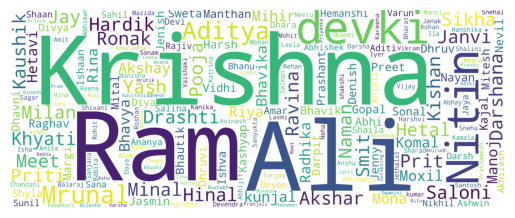

In [19]:
# building a word cloud

text =  " ".join(i for i in data.Name)
word_cloud = WordCloud(width=5000,height=2000,background_color="white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")    
plt.show()

#Word clouds generally help us visualize textual data. We are going to build a word cloud representing the 
#names in the dataset. The size of each name shall depend upon its frequency in the dataset.

#Conclusion: names starting with the letter ‘A’ are prominently visible in the word cloud. 
# This supports our earlier analysis that most of the names start with the letter 's',‘A’ in the dataset.

# 5. Building models using logistic regression, naive Bayes, and XGBoost

In [20]:
X =list( data['Name']) #predictor variable
Y = list(data['Gender']) #target variable

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
Y = encoder.fit_transform(Y) #to convert the ‘F’ and ‘M’ labels into a machine-readable format.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='char') #not 'word' since this aren't english literature words
cv.fit(X)
X=cv.transform(X).toarray() #vectorize the names into vector-like data to make the modeling process easier

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
LR_model= LogisticRegression()
LR_model.fit(x_train,y_train)
LR_y_pred = LR_model.predict(x_test)


#Logistic regression is one of the most commonly used machine learning algorithms for solving classification problems.
#  It is used to predict the likelihood of a certain value belonging to a certain category. It tells the likelihood of 
# a data point belonging to class 0 or class 1.

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train,y_train)
RF_y_pred = RF_model.predict(x_test)

#Random Forest is a supervised machine learning algorithm made up of decision trees. Random Forest is used for 
# both classification and regression

In [26]:
from sklearn import svm
svm_model= svm.LinearSVC()
svm_model.fit(x_train,y_train)
svm_y_pred = svm_model.predict(x_test)

#It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is
# the number of features you have), with the value of each feature being the value of a particular coordinate.

In [27]:
from sklearn.naive_bayes import MultinomialNB
NB_model= MultinomialNB()
NB_model.fit(x_train,y_train)
NB_y_pred = NB_model.predict(x_test)


#Naïve Bayes is a supervised learning algorithm widely used to classify texts and high-dimensional training data. 
# It is capable of making very quick decisions and hence takes minimal training and testing time.
#Naive Bayes is a fast and easy algorithm that can be used for both binary and multiclass classification problems. 
# However, it presumes that the dataset’s features are uncorrelated, making it difficult to learn the relationship 
# between the variables.

In [28]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()#use_label_encoder= False)
XGB_model.fit(x_train,y_train)
XGB_y_pred = XGB_model.predict(x_test)


#XGBoost is one of the most powerful machine learning algorithms in use today. It stands for eXtreme Gradient Boosted 
# Trees. It is designed to improve the performance of predictive models by exploiting the pattern recognition 
# capabilities embedded in deep learning networks. XGBoost is fast, efficient, and scalable, making it a popular choice
#  for people who need to train large models quickly

# 6. Comparison of results

In [29]:
from sklearn.metrics import confusion_matrix

def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)                                                             #3
    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)                        #4
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

0.6547314578005116
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       191
           1       0.66      0.68      0.67       200

    accuracy                           0.65       391
   macro avg       0.65      0.65      0.65       391
weighted avg       0.65      0.65      0.65       391

[[121  70]
 [ 65 135]]
None


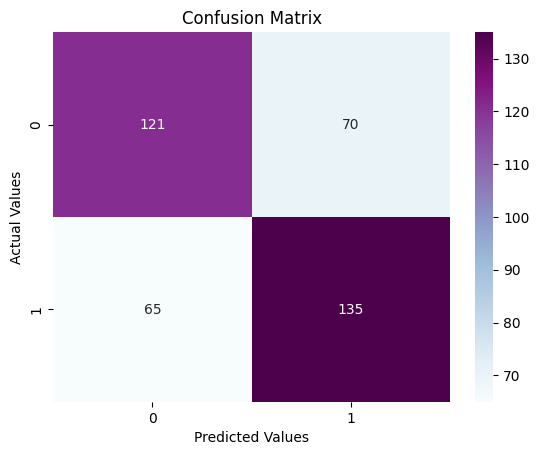

In [30]:
import sklearn.metrics as metrics

#for logistic regression
print(metrics.accuracy_score(LR_y_pred,y_test))                                #1
print(metrics.classification_report(y_test, LR_y_pred))                        #2
print(cmatrix(LR_model))

0.6240409207161125
              precision    recall  f1-score   support

           0       0.60      0.70      0.64       191
           1       0.66      0.56      0.60       200

    accuracy                           0.62       391
   macro avg       0.63      0.63      0.62       391
weighted avg       0.63      0.62      0.62       391

[[133  58]
 [ 89 111]]
None


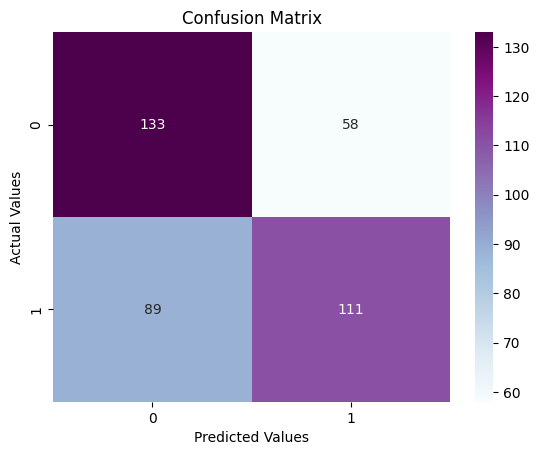

In [31]:
import sklearn.metrics as metrics

#for random forest
print(metrics.accuracy_score(RF_y_pred,y_test))                                
print(metrics.classification_report(y_test, RF_y_pred))                        
print(cmatrix(RF_model))

0.6675191815856778
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       191
           1       0.66      0.71      0.69       200

    accuracy                           0.67       391
   macro avg       0.67      0.67      0.67       391
weighted avg       0.67      0.67      0.67       391

[[119  72]
 [ 58 142]]
None


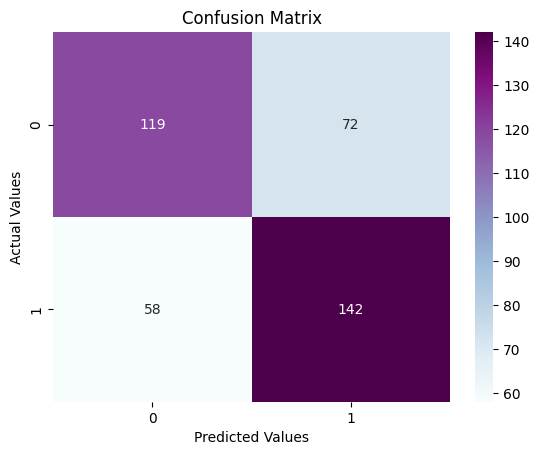

In [32]:
import sklearn.metrics as metrics

#for svm
print(metrics.accuracy_score(svm_y_pred,y_test))                                
print(metrics.classification_report(y_test, svm_y_pred))                        
print(cmatrix(svm_model))

0.59846547314578
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       191
           1       0.64      0.49      0.56       200

    accuracy                           0.60       391
   macro avg       0.61      0.60      0.59       391
weighted avg       0.61      0.60      0.59       391

[[136  55]
 [102  98]]
None


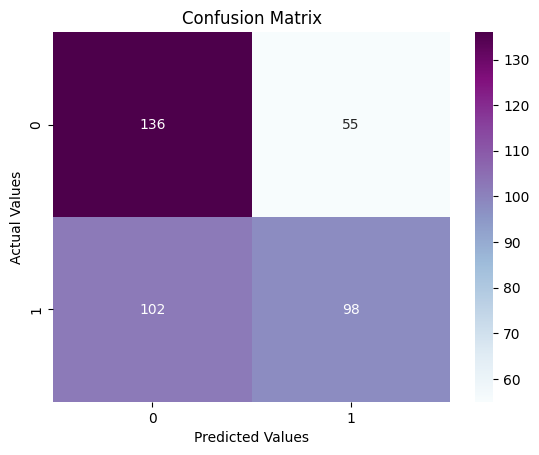

In [33]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))
print(metrics.classification_report(y_test, NB_y_pred))
print(cmatrix(NB_model))

0.6368286445012787
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       191
           1       0.64      0.67      0.65       200

    accuracy                           0.64       391
   macro avg       0.64      0.64      0.64       391
weighted avg       0.64      0.64      0.64       391

[[115  76]
 [ 66 134]]
None


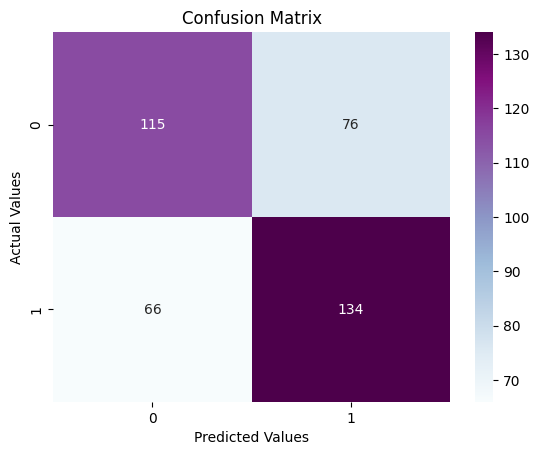

In [34]:
# for XGBoost
print(metrics.accuracy_score(XGB_y_pred,y_test))
print(metrics.classification_report(y_test, XGB_y_pred))
print(cmatrix(XGB_model))

#Conclusion: Out of all the three mentioned algorithms, SVM seems to have performed better

# 7. Deep learning

In [35]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM

In [36]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(1000,32,input_length=28))
#Embedding(input_dim,output_dim,input_length=None)
LSTM_model.add(LSTM(100,activation="tanh",input_shape=(2,1),dropout=0.3))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(80,activation='relu'))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(1,activation='sigmoid'))
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [37]:
LSTM_model.fit(x_train,y_train,epochs=150,batch_size=32)

Epoch 1/150
25/25 [==============================] - 7s 61ms/step - loss: 0.6925 - accuracy: 0.5233
Epoch 2/150
25/25 [==============================] - 2s 62ms/step - loss: 0.6896 - accuracy: 0.5397
Epoch 3/150
25/25 [==============================] - 2s 72ms/step - loss: 0.6912 - accuracy: 0.5397
Epoch 4/150
25/25 [==============================] - 2s 80ms/step - loss: 0.6937 - accuracy: 0.5397
Epoch 5/150
25/25 [==============================] - 2s 60ms/step - loss: 0.6910 - accuracy: 0.5397
Epoch 6/150
25/25 [==============================] - 2s 63ms/step - loss: 0.6911 - accuracy: 0.5397
Epoch 7/150
25/25 [==============================] - 1s 56ms/step - loss: 0.6903 - accuracy: 0.5397
Epoch 8/150
25/25 [==============================] - 2s 61ms/step - loss: 0.6900 - accuracy: 0.5397
Epoch 9/150
25/25 [==============================] - 1s 56ms/step - loss: 0.6892 - accuracy: 0.5385
Epoch 10/150
25/25 [==============================] - 1s 46ms/step - loss: 0.6874 - accuracy: 0.5410

In [38]:
print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 32)            32000     
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 80)                8080      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 93,361
Trainable params: 93,361
Non-traina

LSTM has given an accuracy of 90%, which is more than SVM

In [39]:
def predict(name):
    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict([name_samplevector])
    print(prediction)
    if prediction[0] >=0.4:

        out = 'Male '

    else:

        out = 'Female '
    print(name+' is a '+ out)



In [43]:
predict('Saurabh')

#name_samplevector = cv.transform([name]).toarray()

1/1 [==============================] - 0s 25ms/step
[[0.33740157]]
Saurabh is a Female 


Identification of gender using names is important for many businesses.
XGBoost gives better accuracy compared to logistic regression and naïve bayes when used for gender classification problems.
LSTM is a recurrent neural network that works best for text classification.
LSTM provides an accuracy of 85%, giving out the most accurate results